In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
circuit = QuantumCircuit(2,1)

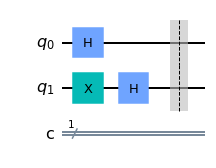

In [3]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

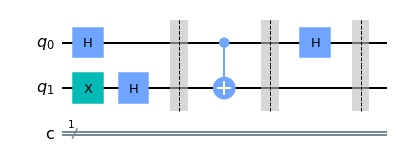

In [4]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

In [5]:
circuit.measure(0,0)

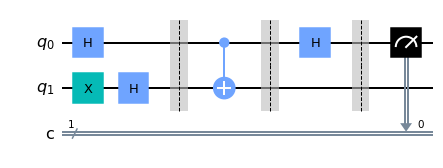

In [6]:
circuit.draw(output='mpl')

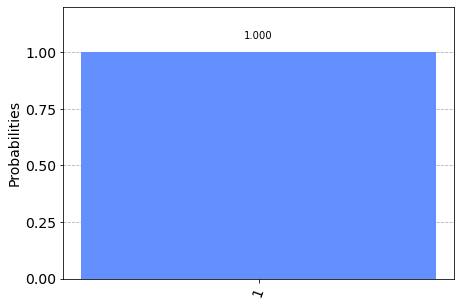

In [7]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=backend, shots=1024).result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [8]:
#Real Quantum Computer

In [9]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = IBMQ.get_provider("ibm-q")

In [11]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 3 & simulated qubits
ibmq_armonk : 9 & 1 qubits
ibmq_lima : 29 & 5 qubits
ibmq_belem : 33 & 5 qubits
ibmq_quito : 74 & 5 qubits
simulator_statevector : 3 & simulated qubits
simulator_mps : 3 & simulated qubits
simulator_extended_stabilizer : 3 & simulated qubits
simulator_stabilizer : 3 & simulated qubits
ibmq_manila : 237 & 5 qubits
ibm_nairobi : 2 & 7 qubits
ibm_oslo : 23 & 7 qubits


In [12]:
quantum_computer = provider.get_backend('ibm_nairobi')

In [13]:
quantum_result = execute(circuit, backend=quantum_computer,shots=1024).result()

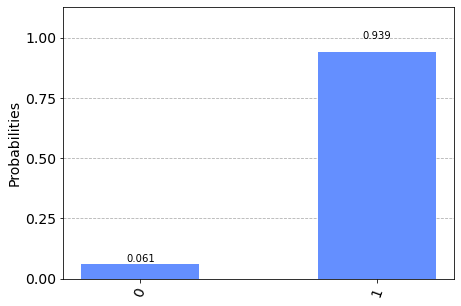

In [14]:
quantum_counts = quantum_result.get_counts(circuit)
plot_histogram([quantum_counts])